# Introdução

Este estudo tem por fim analisar de forma empírica a complexidade do tempo de execução de uma série de algorimos de busca e ordenação.

Todos os algoritmos a seguir foram implementados em C e compilados com o GCC com a flag de debug `-ggdb3` ativada.

Os vetores são contruidos aleatóriamente de inteiros no intervalo de [0, INT_MAX]. Os testes consistem de vetores de tamanhos que variam [1, 140 000], com passo de 200 elementos e 1000 repetições para cada tamanho.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

## Linear search

A busca linear é um algoritmo que percorre um vetor de forma sequencial, comparando cada elemento do vetor com o elemento que se deseja encontrar.

Sua complexidade é a seguinte para o caso onde o elemento procurado encontra-se no vetor:

| Case                        | Order |
|-----------------------------|-------|
| Worst-case performance      | O(n)  |
| Best-case performance       | O(1)  |
| Average performance         | O(n)  |
| Worst-case space complexity | O(1)  |

In [6]:
%%bash
cd benchmarks/linear_search

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media 
1 0 1e-06 1.86e-07
201 0 1e-06 4.12e-07
401 0 1e-06 5.88e-07
601 0 2e-06 7.49e-07
801 0 2e-06 9.99e-07
1001 0 3e-06 1.186e-06
1201 0 3.7e-05 1.442e-06
1401 0 3.9e-05 1.652e-06
1601 0 4e-06 1.776e-06
...
138201 0 0.000749 0.000136457
138401 0 0.001501 0.000144896
138601 0 0.000904 0.000138291
138801 0 0.00071 0.000140791
139001 0 0.001476 0.000144351
139201 0 0.000903 0.000147772
139401 0 0.002176 0.00015879
139601 0 0.000575 0.000142429
139801 0 0.000402 0.00014214
140001 0 0.000465 0.000143061


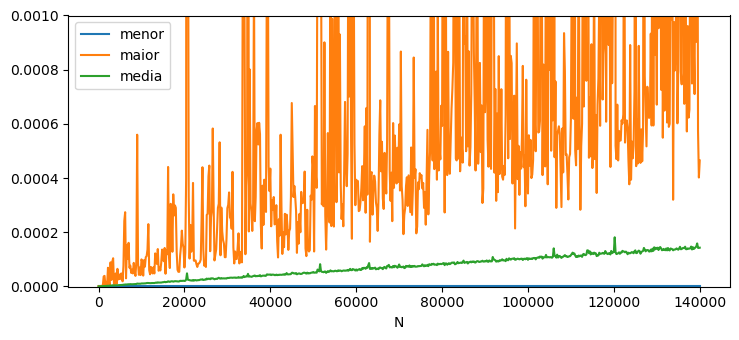

In [17]:
headers = ["N", "menor", "maior", "media"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

# a coluna 'maior' pode ser removida do dataframe para analizar
# unicamente o comportamento linear da média
df.loc[:, df.columns.difference([])].set_index("N").plot()

ax = plt.gca()
ax.set_ylim([-0.1e-5, 0.1e-02])

plt.show()

### Resultados

#### A curva do pior caso cresce como esperado, i.e., como uma função linear?

Sim, a curva do pior caso cresce como esperado.

Mesmo com a presença de outliers, na média, se assemelha a uma função linear.

(-1e-06, 0.002)

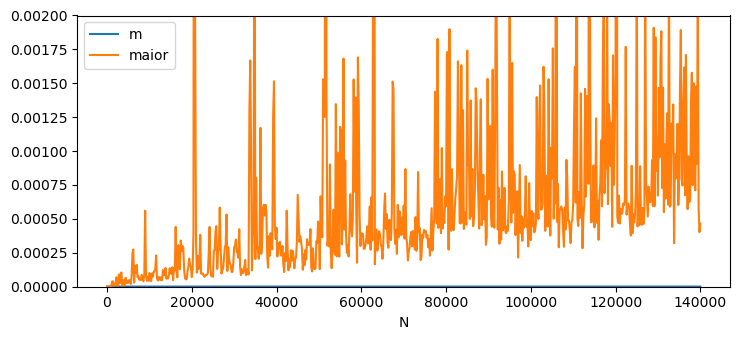

In [31]:
headers = ["N", "menor", "maior", "media"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

#df['m'] = np.gradient(df['maior']) / df['N']

df.loc[:, df.columns.difference(['menor', 'media'])].set_index("N").plot()

ax = plt.gca()
ax.set_ylim([-0.1e-5, 0.2e-02])

plt.show()

#### E a do melhor caso? Ela é aproximadamente constante? Se não, como você explicaria isso?

A curva do melhor caso é constante e é igual a zero.

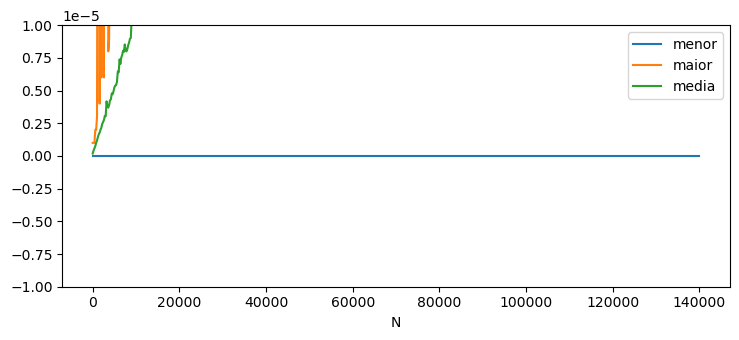

In [29]:
headers = ["N", "menor", "maior", "media"]

src = "benchmarks/linear_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

df.set_index("N").plot()

ax = plt.gca()
ax.set_ylim([-0.1e-04, 0.1e-04])

plt.show()

#### A curva do caso médio cresce na mesma taxa que o pior caso?

Não, a curva do caso médio mesmo linear cresce com um coeficiente angular visualmente menor que o do pior caso.

#### Na aula, vimos que o caso médio da busca linear é 2x mais rápido que o pior caso. Isto é visível no gráfico?



## Binary Search

A busca binária é um algoritmo que percorre um vetor ordenado através do método de dividir para conquistar, partindo ele em subvetores e comparando o elemento que se deseja encontrar com o elemento do meio do vetor, seguindo para a metade do vetor onde o elemento se encontra.

Sua complexidade é a seguinte para o caso onde o elemento procurado encontra-se no vetor:

| Case                        | Order     |
|-----------------------------|-----------|
| Worst-case performance      | O(log n)  |
| Best-case performance       | O(1)      |
| Average performance         | O(log n)  |
| Worst-case space complexity | O(1)      |

In [9]:
%%bash
cd benchmarks/binary_search

make
./main > out.csv

echo "-------------------"

head out.csv
echo "..."
tail out.csv

make -C ../lib/
make[1]: Entering directory '/home/srjheam/projects/ed/benchmarks/lib'
mkdir -p build/
ar rcs libbench.a build/vector.o build/profiler.o
make[1]: Leaving directory '/home/srjheam/projects/ed/benchmarks/lib'
gcc -o main main.c -L ../lib/ -lbench -Wall -Wall -Wextra -Werror -pedantic -ggdb3 -I../lib -lm
-------------------
N menor maior media 
1 0 1e-06 2.24e-07
201 0 1e-06 4.29e-07
401 0 1e-06 2.94e-07
601 0 1e-06 9.4e-08
801 0 1e-06 1e-07
1001 0 1e-06 1.26e-07
1201 0 1e-06 1.72e-07
1401 0 1e-06 1.99e-07
1601 0 1e-06 2.01e-07
...
138201 0 4e-06 5.21e-07
138401 0 3e-06 3.79e-07
138601 0 5e-06 3.78e-07
138801 0 5e-06 4.42e-07
139001 0 4.1e-05 4.57e-07
139201 0 1e-06 3.59e-07
139401 0 5e-06 3.8e-07
139601 0 3e-06 5.04e-07
139801 0 3e-06 3.62e-07
140001 0 1e-06 3.6e-07


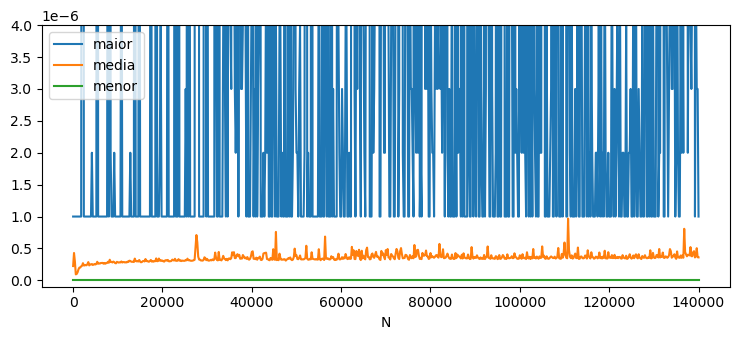

In [10]:
headers = ["N", "menor", "maior", "media"]

src = "benchmarks/binary_search/out.csv"

df = pd.read_csv(src, names=headers, delim_whitespace=True, skiprows=1)

# a coluna 'maior' pode ser removida do dataframe para analizar
# unicamente o comportamento linear da média
df.loc[:, df.columns.difference([''])].set_index("N").plot()

ax = plt.gca()
ax.set_ylim([-0.1e-6, 0.4e-05])

plt.show()